#### Instructions
+ Apply the Random Forests algorithm but this time only by upscaling the data.
+ Use Feature Selections that you have learned in class to decide if you want to use all of the features (PCA, etc)
+ Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?


#### Importing libraries

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")


In [433]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
target = pd.read_csv('target.csv')

In [434]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [435]:
categorical = categorical.astype(object)

In [436]:
categorical.dtypes

STATE           object
CLUSTER         object
HOMEOWNR        object
GENDER          object
DATASRCE        object
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B        object
ODATEW_YR       object
ODATEW_MM       object
DOB_YR          object
DOB_MM          object
MINRDATE_YR     object
MINRDATE_MM     object
MAXRDATE_YR     object
MAXRDATE_MM     object
LASTDATE_YR     object
LASTDATE_MM     object
FIRSTDATE_YR    object
FIRSTDATE_MM    object
dtype: object

In [437]:
numerical.shape, categorical.shape, target.shape

((95412, 315), (95412, 22), (95412, 2))

#### Building the dataframe

In [438]:
X = pd.concat([numerical,categorical], axis = 1)
Y = target

In [439]:
X.shape

(95412, 337)

#### Train test split

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['TARGET_B'], test_size = 0.2, random_state = 1)

In [441]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

MinMax Scaler

In [442]:
from sklearn.preprocessing import MinMaxScaler
def EscaladorMinMax(data, MinMaxtransformer):
    X_normalized = MinMaxtransformer.transform(data)
    print(X_normalized.shape)
    X_normalized = pd.DataFrame(X_normalized,columns=data.columns)
    return X_normalized

In [443]:
MinMaxtransformer = MinMaxScaler().fit(X_train_num) # Only run once

In [444]:
X_train_num_scaled = EscaladorMinMax(X_train_num, MinMaxtransformer)
X_test_num_scaled = EscaladorMinMax(X_test_num, MinMaxtransformer)

(76329, 315)
(19083, 315)


In [445]:
X_train_num_scaled.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.000014,0.422680,0.666667,0.888889,0.004149,0.020202,0.181818,0.494949,0.070707,0.030303,...,0.146341,0.006,0.007035,0.011,0.019301,0.011970,0.250609,0.0,0.000000,0.262295
1,0.000000,0.624862,0.666667,1.000000,0.000000,0.000000,0.232323,0.292929,0.373737,0.050505,...,0.000000,0.004,0.005025,0.010,0.005515,0.012960,0.098651,1.0,0.666667,0.704918
2,0.000014,0.608247,0.166667,1.000000,0.049793,0.000000,0.212121,0.585859,0.000000,0.070707,...,0.243902,0.006,0.007035,0.012,0.001838,0.010591,0.476022,0.0,0.333333,0.065574
3,0.000014,0.319588,0.333333,1.000000,0.000000,0.040404,0.414141,0.494949,0.252525,0.101010,...,0.024390,0.030,0.010050,0.015,0.008272,0.027145,0.790496,0.0,0.000000,0.131148
4,0.000014,0.624862,0.166667,0.222222,0.000000,0.000000,0.272727,0.474747,0.191919,0.020202,...,0.024390,0.050,0.020101,0.025,0.008272,0.046939,0.309990,1.0,0.000000,0.704918


One Hot Encoding

In [446]:
from sklearn.preprocessing import OneHotEncoder
def OneHotEncoding(data, OneHotEncoder):
    encoded = OneHotEncoder.transform(data).toarray()
    onehot_encoded = pd.DataFrame(encoded)
    return onehot_encoded

In [447]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat) # Only run once

In [448]:
X_train_cat_encoded = OneHotEncoding(X_train_cat, encoder)
X_test_cat_encoded = OneHotEncoding(X_test_cat, encoder)

In [449]:
X_train_cat_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [450]:
X_train_num_scaled.shape, X_train_cat_encoded.shape

((76329, 315), (76329, 314))

#### Full train and test dataframes

In [451]:
X_train_full = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_full = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis = 1)


In [452]:
X_train_full.shape, X_test_full.shape, Y.shape

((76329, 629), (19083, 629), (95412, 2))

In [453]:
y_train.value_counts()

0    72464
1     3865
Name: TARGET_B, dtype: int64

#### Finding out how many people donated

### Feature selection - PCA

In [454]:
from sklearn.decomposition import PCA

In [455]:
pca = PCA()
pca.fit(X_train_num_scaled)

PCA()

In [456]:
# pca.explained_variance_ratio_.round(3)

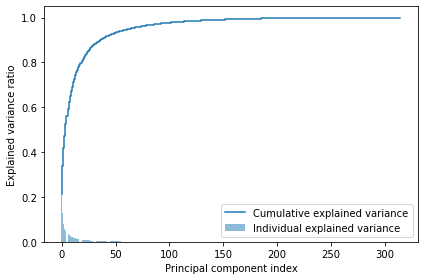

In [457]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
        where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [458]:
pca.explained_variance_ratio_[:40].sum()

0.9082841657364382

In [459]:
pca.explained_variance_ratio_[:7].sum()

0.5937141673189735

In [460]:
pca = PCA(40)
pca.fit(X_train_num_scaled)

PCA(n_components=40)

In [461]:
pca.explained_variance_ratio_.sum()

0.9082200545129333

In [462]:
pca = PCA(0.90)
pca.fit(X_train_num_scaled)

PCA(n_components=0.9)

In [463]:
pca.explained_variance_ratio_.sum()

0.9025483537322981

In [464]:
X_train_pca = pca.transform(X_train_num_scaled)
X_test_pca = pca.transform(X_test_num_scaled)

In [465]:
X_train_pca.shape

(76329, 38)

In [466]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.845857,0.495887,1.581791,-1.201721,-0.331783,0.194888,-0.356225,-0.103483,-0.569753,0.257862,...,-0.117880,0.249332,-0.024270,0.009178,-0.094792,-0.174990,0.143053,-0.022045,0.032428,0.242638
1,-1.367388,-0.722809,0.014170,-0.042419,0.069735,-0.392039,0.237921,-0.362419,-0.207854,0.302280,...,0.040617,0.044303,0.132527,-0.009611,0.046344,0.002735,0.006644,-0.180003,-0.127716,-0.060297
2,1.485858,-1.251468,-0.636821,-0.672647,-0.682878,0.370608,-0.242719,0.057218,0.138294,0.005142,...,-0.072401,-0.285004,0.125114,0.057509,-0.199581,0.229063,0.004425,0.108215,0.004627,-0.102101
3,1.552294,-0.388458,-0.672987,0.092351,-0.846046,0.281638,-0.085035,-0.012994,0.711850,0.061688,...,0.055367,0.200308,0.041817,-0.262563,0.255096,-0.006375,0.194698,0.021090,0.207978,0.014583
4,-1.565245,-0.718274,-0.440359,-0.060715,0.072025,-0.752750,0.360615,-0.473446,-0.158493,0.269209,...,-0.229362,0.113455,0.093328,-0.106113,0.027363,0.072400,0.171530,0.021866,0.100005,-0.119603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.109854,0.401991,-1.512888,0.187261,-0.103271,0.630841,-0.441430,-0.413009,-0.235614,-0.310446,...,0.100478,0.101858,-0.018993,-0.021438,-0.086348,-0.218205,-0.097078,-0.081017,0.017929,0.202653
76325,0.155101,0.312282,-0.632194,-0.327171,0.431835,-0.239564,-0.070747,-0.373364,0.129102,0.491622,...,0.037117,-0.075947,0.046557,-0.083183,-0.039179,-0.202494,-0.243722,-0.024193,-0.223014,0.203032
76326,0.470358,0.146493,0.140650,0.630874,0.442208,0.971506,-0.394264,-0.350828,0.221177,-0.292644,...,0.093215,0.215618,0.122837,0.107962,-0.292512,-0.069917,0.167328,-0.091292,-0.204389,0.221194
76327,-1.615204,-0.711229,0.264640,0.740110,0.022663,0.491989,-0.018319,-0.417848,-0.130653,-0.500591,...,0.048747,-0.238580,0.120199,-0.136837,0.194173,-0.056632,-0.420637,0.192536,0.176481,-0.034039


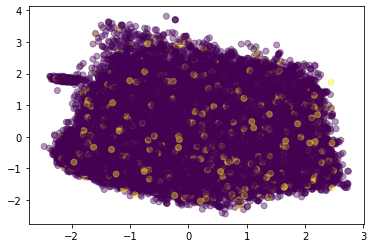

In [467]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c = y_train, alpha = 0.4)

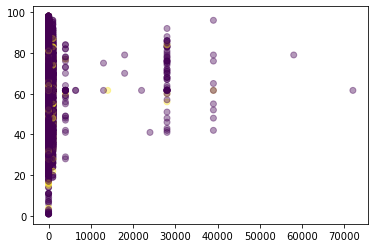

In [468]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], c = y_train, alpha = 0.4)

Text(0.5, 1.0, 'Correlation of PC scores')

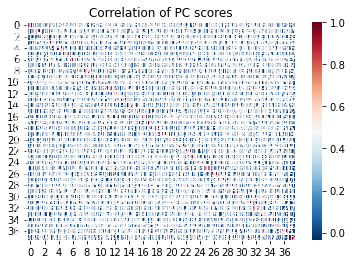

In [469]:
X_train_pca = pca.transform(X_test_num_scaled)
corr_pc = pd.DataFrame(X_train_pca).corr()
sb.heatmap(corr_pc, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Correlation of PC scores')

In [470]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [471]:
# X_train_pca.reset_index(drop=True, inplace=True)
# X_test_pca.reset_index(drop=True, inplace=True)
# X_train_cat_encoded.reset_index(drop=True, inplace=True)
# X_test_cat_encoded.value_counts().reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)

In [472]:
X_train_pca = pd.concat([X_train_pca, X_train_cat_encoded], axis=1)
X_test_pca = pd.concat([X_test_pca, X_test_cat_encoded], axis=1)

In [473]:
X_train_cat_encoded.shape

(76329, 314)

In [474]:
X_train_pca.shape, X_test_pca.shape

((76329, 352), (19083, 352))

In [475]:
trainset = pd.concat([X_train_pca, y_train], axis=1)

In [476]:
category_0 = trainset[trainset['TARGET_B']== 0 ]
category_1 = trainset[trainset['TARGET_B']== 1 ]

In [477]:
category_1.shape

(3865, 353)

#### Upscaling the data from 3865 to 72464

## Upsampling (oversampling)

In [478]:
from sklearn.utils import resample

category_1_oversampled = resample(category_1, 
                                replace=True, 
                                n_samples = len(category_0))

In [479]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72464, 353)
(72464, 353)


In [485]:
category_1_oversampled.head()

,0,1,2,3,4,5,6,7,8,9,...,305,306,307,308,309,310,311,312,313,TARGET_B
40204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
42451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
73654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Random Forest

In [481]:
y_train_over = category_1_oversampled['TARGET_B']
X_train_over = category_1_oversampled.drop('TARGET_B',axis = 1)

In [483]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


clf = RandomForestClassifier(max_depth=5,   # max number of questions to ask
                            min_samples_split=20,   # amount of rows still considered at every question
                            min_samples_leaf =20,   # ultimate answer based on at least this many rows
                            max_samples=0.8,    # fraction of X-train to use in each tree
                            random_state = 42)

clf.fit(X_train_over, y_train_over)
print(clf.score(X_train_over, y_train_over))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html